In [35]:
from lxml.html import parse
from urllib.request import urlopen
from pandas.io.parsers import TextParser
from pandas import Series
import urllib,requests
import pandas as pd
from bs4 import BeautifulSoup


url_nba='https://stats.nba.com/teams/advanced/?sort=W&dir=-1'
url_nba='https://www.basketball-reference.com/leagues/NBA_2019_ratings.html'
url_laker='https://www.basketball-reference.com/teams/LAL/2019.html'
url_laker='https://www.basketball-reference.com/teams/LAL/2009.html'

def _unpack(row,kind='td'):
    elts=row.findall('.//%s' %kind)
    return [val.text_content() for val in elts]

def parse_options_data(table):
    rows=table.findall('.//tr')
    header=_unpack(rows[0],kind='th')
    data=[_unpack(r) for r in rows[1:]]
    #return data
    return TextParser(data,names=header).get_chunk()

parsedurl=parse(urlopen(url_laker))
url=parsedurl.getroot()
tables=url.findall('.//table')

url_link_pos_all=url.findall('.//a')
links=url.findall('.//a')
urls=[lnk.get('href') for lnk in url_link_pos_all]


In [36]:
urls_player=[]
for url in urls[:]:
    if url is not None and url[:8]=='/players' and url.endswith('.html'):
        urls_player.append(url)
len(urls_player)
print(urls_player) 

#print(urls_player)  
end=tables[0]
rows=end.findall('.//tr')
header=_unpack(rows[0],kind='th')
print(header)
data=[_unpack(r) for r in rows[:]]
data=TextParser(data,names=header[1:]).get_chunk()
data.to_csv('/Users/brettlv/blog/brettlv.github.io/pythoncode/laker_2009.csv')

['/players/a/arizatr01.html', '/players/b/brownsh01.html', '/players/b/bryanko01.html', '/players/b/bynuman01.html', '/players/f/farmajo01.html', '/players/f/fishede01.html', '/players/g/gasolpa01.html', '/players/m/mbengdj01.html', '/players/m/mihmch01.html', '/players/m/morriad01.html', '/players/o/odomla01.html', '/players/p/poweljo01.html', '/players/r/radmavl01.html', '/players/v/vujacsa01.html', '/players/w/waltolu01.html', '/players/y/yuesu01.html', '/players/j/jamesle01.html', '/players/l/leonaka01.html', '/players/d/davisan02.html', '/players/h/hardeja01.html', '/players/g/georgpa01.html', '/players/p/porzikr01.html', '/players/i/iversal01.html', '/players/k/kiddja01.html', '/players/w/wadedw01.html', '/players/h/hayesel01.html', '/players/o/onealsh01.html', '/players/r/russebi01.html', '/players/d/duranke01.html', '/players/j/jamesle01.html', '/players/h/hardeja01.html', '/players/p/paulch01.html', '/players/w/westbru01.html', '/players/c/curryst01.html']
['No.', 'Player', 'P

In [2]:
len(tables)

1

['No.', 'Player', 'Pos', 'Ht', 'Wt', 'Birth Date', '\xa0', 'Exp', 'College']


In [11]:
listfirst=_unpack(rows[1],kind='td')
listfirst

['LeBron James', 'PG', '6-9', '250', 'December 30, 1984', 'us', '16', '']

In [50]:
len(rows)

18

In [37]:
data

,Player,Pos,Ht,Wt,Birth Date,,Exp,College
0,Trevor Ariza,SF,6-8,215,"June 30, 1985",us,4,UCLA
1,Shannon Brown,SG,6-4,205,"November 29, 1985",us,2,Michigan State
2,Kobe Bryant,SG,6-6,212,"August 23, 1978",us,12,NaN
3,Andrew Bynum,C,7-0,285,"October 27, 1987",us,3,NaN
4,Jordan Farmar,PG,6-2,180,"November 30, 1986",us,2,UCLA
5,Derek Fisher,PG,6-1,200,"August 9, 1974",us,12,Little Rock
6,Pau Gasol,C,7-1,250,"July 6, 1980",es,7,NaN
7,Didier Ilunga-Mbenga,C,7-0,245,"December 30, 1980",cd,4,NaN
8,Chris Mihm,C,7-0,265,"July 16, 1979",us,7,Texas
9,Adam Morrison,SF,6-8,205,"July 19, 1984",us,1,Gonzaga


In [13]:
pwd

'/Users/brettlv/blog/brettlv.github.io/pythoncode'

In [38]:
import re
import urllib,urllib.request;
from bs4 import BeautifulSoup
import requests,os
import os,time
#os.chdir('/Volumes/Seagate_Backup_Plus_Drive_Lvb/backupmac/lakerplayer/2019-20/')
#os.chdir('/Users/brettlv/blog/brettlv.github.io/pythoncode/laker.csv')

datapath='/Volumes/Seagate_Backup_Plus_Drive_Lvb/backupmac/lakerplayer/2008-09/'

#通过url获取网页
def getHtml(url,name):
    # 要设置请求头，让服务器知道不是机器人
    user_agent = 'Mozilla/4.0 (compatible; MSIE 5.5; Windows NT)'
    headers = {'User-Agent': user_agent}
    html=requests.get(url).text
    soup=BeautifulSoup(html,'html.parser')
    pic_url = soup.find_all('img',src=re.compile(r'^https://.*?jpg$'))
    print(pic_url)
    for url in pic_url:
        img=url['src']
        pic=requests.get(img,timeout=1)
        file_name=name+'.jpg'
        with open('%s/%s'%(datapath,file_name),'wb') as fp:
            fp.write(pic.content) 
        time.sleep(2)
         

In [39]:
for i,(playerurl,playername) in enumerate(zip(urls_player,data['Player'].values)):
    getHtml('https://www.basketball-reference.com'+playerurl,playername)  

[<img alt="Photo of Trevor Ariza" itemscope="image" src="https://d2cwpp38twqe55.cloudfront.net/req/201912041/images/players/arizatr01.jpg"/>]
[<img alt="Photo of Shannon Brown" itemscope="image" src="https://d2cwpp38twqe55.cloudfront.net/req/201912041/images/players/brownsh01.jpg"/>]
[<img alt="Photo of Kobe Bryant" itemscope="image" src="https://d2cwpp38twqe55.cloudfront.net/req/201912041/images/players/bryanko01.jpg"/>]
[<img alt="Photo of Andrew Bynum" itemscope="image" src="https://d2cwpp38twqe55.cloudfront.net/req/201912041/images/players/bynuman01.jpg"/>]
[<img alt="Photo of Jordan Farmar" itemscope="image" src="https://d2cwpp38twqe55.cloudfront.net/req/201912041/images/players/farmajo01.jpg"/>]
[<img alt="Photo of Derek Fisher" itemscope="image" src="https://d2cwpp38twqe55.cloudfront.net/req/201912041/images/players/fishede01.jpg"/>]
[<img alt="Photo of Pau Gasol" itemscope="image" src="https://d2cwpp38twqe55.cloudfront.net/req/201912041/images/players/gasolpa01.jpg"/>]
[<img al

ReadTimeout: HTTPSConnectionPool(host='d2cwpp38twqe55.cloudfront.net', port=443): Read timed out. (read timeout=1)

In [21]:
data

,Player,Pos,Ht,Wt,Birth Date,,Exp,College
0,Ivica Zubac,C,7-1,265,"March 18, 1997",ba,2,NaN
1,Brandon Ingram,SG,6-9,190,"September 2, 1997",us,2,Duke University
2,Lonzo Ball,PG,6-6,190,"October 27, 1997",us,1,"University of California, Los Angeles"
3,Kyle Kuzma,SF,6-9,220,"July 24, 1995",us,1,University of Utah
4,Josh Hart,SG,6-5,209,"March 6, 1995",us,1,Villanova University
5,Moritz Wagner,C,6-11,245,"April 26, 1997",de,R,University of Michigan
6,Isaac Bonga,G,6-8,179,"November 8, 1999",de,R,NaN
7,Kentavious Caldwell-Pope,SG,6-5,205,"February 18, 1993",us,5,University of Georgia
8,Rajon Rondo,PG,6-1,186,"February 22, 1986",us,12,University of Kentucky
9,LeBron James,PF,6-8,250,"December 30, 1984",us,15,NaN


In [58]:
data1=pd.read_html(url_laker)
data1

[     No.                    Player Pos    Ht   Wt         Birth Date     Exp  \
 0   40.0               Ivica Zubac   C   7-1  265     March 18, 1997  ba   2   
 1   14.0            Brandon Ingram  SG   6-9  190  September 2, 1997  us   2   
 2    2.0                Lonzo Ball  PG   6-6  190   October 27, 1997  us   1   
 3    0.0                Kyle Kuzma  SF   6-9  220      July 24, 1995  us   1   
 4    3.0                 Josh Hart  SG   6-5  209      March 6, 1995  us   1   
 5   15.0             Moritz Wagner   C  6-11  245     April 26, 1997  de   R   
 6    NaN               Isaac Bonga   G   6-8  179   November 8, 1999  de   R   
 7    1.0  Kentavious Caldwell-Pope  SG   6-5  205  February 18, 1993  us   5   
 8    9.0               Rajon Rondo  PG   6-1  186  February 22, 1986  us  12   
 9   23.0              LeBron James  PF   6-8  250  December 30, 1984  us  15   
 10   6.0          Lance Stephenson  SG   6-5  230  September 5, 1990  us   8   
 11  10.0            Svi Myk

In [59]:
data1=pd.read_html('https://www.basketball-reference.com/teams/LAL/2019.html#all_advanced')
data1

[     No.                    Player Pos    Ht   Wt         Birth Date     Exp  \
 0   40.0               Ivica Zubac   C   7-1  265     March 18, 1997  ba   2   
 1   14.0            Brandon Ingram  SG   6-9  190  September 2, 1997  us   2   
 2    2.0                Lonzo Ball  PG   6-6  190   October 27, 1997  us   1   
 3    0.0                Kyle Kuzma  SF   6-9  220      July 24, 1995  us   1   
 4    3.0                 Josh Hart  SG   6-5  209      March 6, 1995  us   1   
 5   15.0             Moritz Wagner   C  6-11  245     April 26, 1997  de   R   
 6    NaN               Isaac Bonga   G   6-8  179   November 8, 1999  de   R   
 7    1.0  Kentavious Caldwell-Pope  SG   6-5  205  February 18, 1993  us   5   
 8    9.0               Rajon Rondo  PG   6-1  186  February 22, 1986  us  12   
 9   23.0              LeBron James  PF   6-8  250  December 30, 1984  us  15   
 10   6.0          Lance Stephenson  SG   6-5  230  September 5, 1990  us   8   
 11  10.0            Svi Myk

In [66]:
lakersadv=pd.read_csv('/Users/brettlv/lakers')

In [67]:
lakersadv

,Rk,player,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,...,Unnamed: 17,OWS,DWS,WS,WS/48,Unnamed: 22,OBPM,DBPM,BPM,VORP
0,1,LeBron James\jamesle01,34,22,766,26.9,0.609,0.298,0.390,3.1,...,NaN,2.2,1.1,3.3,0.204,NaN,6.2,1.3,7.5,1.8
1,2,Kyle Kuzma\kuzmaky01,23,22,679,13.9,0.547,0.376,0.188,2.0,...,NaN,0.4,0.6,1.1,0.074,NaN,-0.9,-1.4,-2.3,-0.1
2,3,Lonzo Ball\balllo01,21,22,594,11.0,0.492,0.512,0.093,4.1,...,NaN,-0.1,0.7,0.7,0.054,NaN,-1.4,1.2,-0.1,0.3
3,4,Brandon Ingram\ingrabr01,21,18,581,11.3,0.517,0.138,0.339,2.2,...,NaN,-0.3,0.5,0.3,0.021,NaN,-3.7,-0.7,-4.3,-0.3
4,5,Josh Hart\hartjo01,23,22,542,12.7,0.595,0.624,0.197,2.0,...,NaN,0.5,0.7,1.2,0.106,NaN,0.3,0.8,1.1,0.4
5,6,JaVale McGee\mcgeeja01,31,22,534,22.2,0.637,0.021,0.216,10.4,...,NaN,1.0,1.0,2.0,0.179,NaN,-0.2,4.5,4.3,0.9
6,7,Kentavious Caldwell-Pope\caldwke01,25,22,459,10.3,0.535,0.566,0.329,2.1,...,NaN,0.3,0.4,0.7,0.073,NaN,-1.3,-1.4,-2.7,-0.1
7,8,Lance Stephenson\stephla01,28,22,334,14.5,0.522,0.383,0.117,4.2,...,NaN,0.0,0.4,0.5,0.068,NaN,-1.1,-0.3,-1.4,0.1
8,9,Rajon Rondo\rondora01,32,11,278,13.8,0.508,0.239,0.091,3.8,...,NaN,0.1,0.3,0.5,0.079,NaN,-1.2,0.0,-1.3,0.1
9,10,Tyson Chandler\chandty01,36,12,250,10.4,0.600,0.000,0.567,13.2,...,NaN,0.2,0.3,0.5,0.103,NaN,-2.7,1.2,-1.4,0.0


In [73]:
pwd

'/Volumes/Seagate_Backup_Plus_Drive_Lvb/backupmac/lakerplayer'

In [74]:
mkdir /Volumes/Seagate_Backup_Plus_Drive_Lvb/backupmac/lakerplayer/TWplay

In [69]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt


from matplotlib.offsetbox import AnnotationBbox, OffsetImage
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,AnnotationBbox)
from matplotlib.cbook import get_sample_data
import os
import skimage.io as io
from skimage import data_dir



In [72]:
print(coll)

['/Volumes/Seagate_Backup_Plus_Drive_Lvb/backupmac/lakerplayer/Alex Caruso\xa0\xa0(TW).jpg', '/Volumes/Seagate_Backup_Plus_Drive_Lvb/backupmac/lakerplayer/Brandon Ingram.jpg', '/Volumes/Seagate_Backup_Plus_Drive_Lvb/backupmac/lakerplayer/Isaac Bonga.jpg', '/Volumes/Seagate_Backup_Plus_Drive_Lvb/backupmac/lakerplayer/Ivica Zubac.jpg', '/Volumes/Seagate_Backup_Plus_Drive_Lvb/backupmac/lakerplayer/JaVale McGee.jpg', '/Volumes/Seagate_Backup_Plus_Drive_Lvb/backupmac/lakerplayer/Johnathan Williams\xa0\xa0(TW).jpg', '/Volumes/Seagate_Backup_Plus_Drive_Lvb/backupmac/lakerplayer/Josh Hart.jpg', '/Volumes/Seagate_Backup_Plus_Drive_Lvb/backupmac/lakerplayer/Kentavious Caldwell-Pope.jpg', '/Volumes/Seagate_Backup_Plus_Drive_Lvb/backupmac/lakerplayer/Kyle Kuzma.jpg', '/Volumes/Seagate_Backup_Plus_Drive_Lvb/backupmac/lakerplayer/Lance Stephenson.jpg', '/Volumes/Seagate_Backup_Plus_Drive_Lvb/backupmac/lakerplayer/LeBron James.jpg', '/Volumes/Seagate_Backup_Plus_Drive_Lvb/backupmac/lakerplayer/Lonzo 

In [77]:
x,y

(array([-3.7, -4.5, -0.2, -1.2,  0.3, -1.3, -0.9, -1.1,  6.2, -1.4, -6.5,
        -9.9, -1.2, -4.2, -2.7]),
 array([-0.7,  0.1,  4.5,  0.2,  0.8, -1.4, -1.4, -0.3,  1.3,  1.2, -2.4,
        -4.1,  0. , -2.6,  1.2]))

-9.9 6.2 -4.1 4.5
-2.15333333333 -0.24


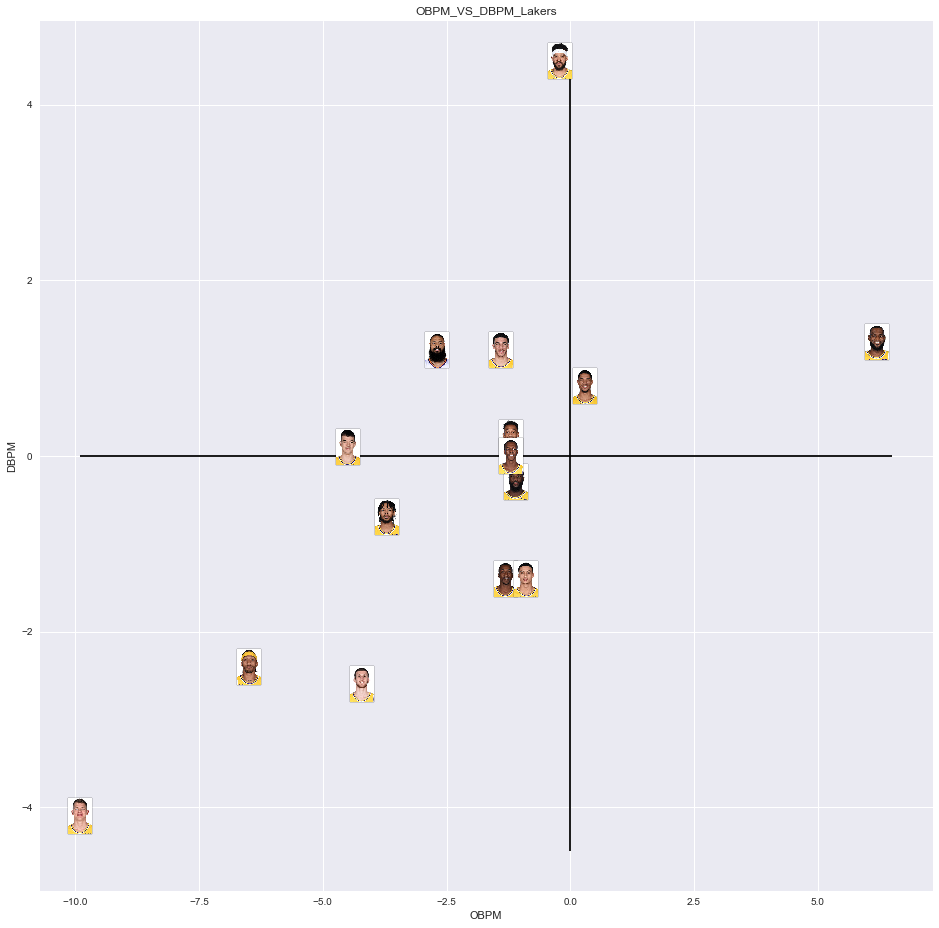

In [119]:
file_dir='/Volumes/Seagate_Backup_Plus_Drive_Lvb/backupmac/lakerplayer/'
#imgslist=os.listdir(file_dir)
os.chdir(file_dir)
coll=io.ImageCollection(file_dir+'/*.jpg')
#print(coll)
#plt.figure(figsize=(16,16))
fig, ax = plt.subplots(figsize=(16,16))
#x=np.random.randint(50,120,30)
#x=np.linspace(50,200,30)
#y=np.random.randint(80,150,30)
#y=np.linspace(50,200,30)

x=lakersadv.sort_values('player')['OBPM'].values
y=lakersadv.sort_values('player')['DBPM'].values
print(min(x),max(x),min(y),max(y))
print(np.average(x),np.average(y))

for i,(logo_,x_,y_) in enumerate(zip(coll,x,y)):
    imagebox = OffsetImage(logo_, zoom=0.2)
    imagebox.image.axes = ax
    ab = AnnotationBbox(imagebox,xy = [x_,y_],xycoords='data',pad=0.0,)
    ax.add_artist(ab)
    
#img=Image.open('/Volumes/Seagate_Backup_Plus_Drive_Lvb/backupmac/logonba/los-angeles-lakers-logo-vector-200x200.png')
#arr_img=plt.imread('/Volumes/Seagate_Backup_Plus_Drive_Lvb/backupmac/logonba/los-angeles-lakers-logo-vector-200x200.png',format='png')
#imagebox = OffsetImage(img, zoom=0.2)
#imagebox = OffsetImage(arr_img, zoom=0.3)
#imagebox.image.axes = ax
#ab = AnnotationBbox(imagebox,xy = [100,120],xycoords='data',pad=0.0,)
#ax.add_artist(ab)

#ax.plot(x,y,'o')
#ax.plot(np.linspace(100,120,10),np.linspace(100,120,10))
plt.vlines(0,-4.5,4.5)
plt.hlines(0,-9.9,6.5)
plt.xlabel('OBPM')
plt.ylabel('DBPM')
#plt.xlim(-9.9,6.2)
#plt.ylim(-4.1,4.5)
plt.title("OBPM_VS_DBPM_Lakers")
plt.grid(True)
plt.savefig('/Users/brettlv/lakers_OBPM_DBPM.png',dpi=300)
plt.show()

In [105]:
lakersper100=pd.read_csv('/Users/brettlv/lakers_per100')
lakersper100

,Rk,player,Age,G,GS,MP,FG,FGA,FG%,3P,...,TRB,AST,STL,BLK,TOV,PF,PTS,Unnamed: 27,ORtg,DRtg
0,1,LeBron James\jamesle01,34,22,22,766,13.7,26.4,0.520,2.9,...,10.5,8.8,1.8,1.2,4.7,2.5,37.6,NaN,116,107
1,2,Kyle Kuzma\kuzmaky01,23,22,20,679,9.8,20.8,0.469,2.3,...,7.9,2.6,0.8,0.8,2.1,3.4,24.7,NaN,106,111
2,3,Lonzo Ball\balllo01,21,22,20,594,5.4,13.5,0.401,2.3,...,9.4,7.7,2.0,0.5,3.5,4.1,13.8,NaN,100,108
3,4,Brandon Ingram\ingrabr01,21,18,18,581,8.9,19.2,0.464,0.8,...,6.1,3.3,1.1,1.0,3.4,4.3,22.8,NaN,97,111
4,5,Josh Hart\hartjo01,23,22,3,542,6.2,13.5,0.459,3.3,...,6.5,2.4,2.2,1.1,1.7,4.0,17.5,NaN,113,108
5,6,JaVale McGee\mcgeeja01,31,22,22,534,10.3,16.6,0.621,0.1,...,12.2,1.9,1.7,5.4,2.9,5.1,23.1,NaN,118,103
6,7,Kentavious Caldwell-Pope\caldwke01,25,22,3,459,5.4,14.5,0.371,2.6,...,5.1,1.3,1.7,0.4,1.3,3.3,17.8,NaN,108,111
7,8,Lance Stephenson\stephla01,28,22,0,334,9.2,21.5,0.429,3.1,...,10.3,5.6,2.2,0.3,3.6,4.7,23.6,NaN,102,107
8,9,Rajon Rondo\rondora01,32,11,2,278,6.7,14.8,0.455,1.5,...,8.4,11.9,2.2,0.0,4.2,4.2,15.6,NaN,105,109
9,10,Tyson Chandler\chandty01,36,12,0,250,3.2,5.6,0.567,0.0,...,15.7,1.3,1.1,1.1,2.4,6.0,8.4,NaN,116,108


40 121 103 114
101.266666667 109.2


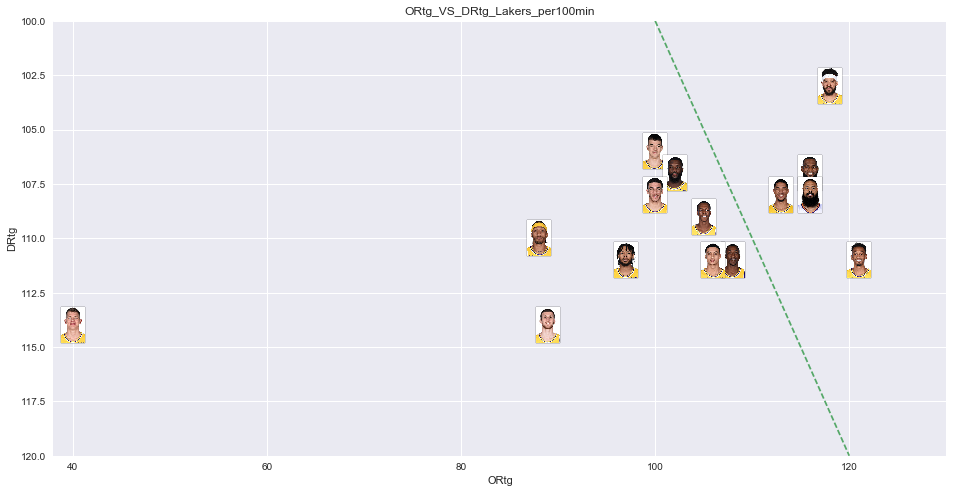

In [118]:

#print(coll)
#plt.figure(figsize=(16,16))
fig, ax = plt.subplots(figsize=(16,8))
#x=np.random.randint(50,120,30)
#x=np.linspace(50,200,30)
#y=np.random.randint(80,150,30)
#y=np.linspace(50,200,30)

x=lakersper100.sort_values('player')['ORtg'].values
y=lakersper100.sort_values('player')['DRtg'].values
print(min(x),max(x),min(y),max(y))
print(np.average(x),np.average(y))

for i,(logo_,x_,y_) in enumerate(zip(coll,x,y)):
    imagebox = OffsetImage(logo_, zoom=0.2)
    imagebox.image.axes = ax
    ab = AnnotationBbox(imagebox,xy = [x_,y_],xycoords='data',pad=0.0,)
    ax.add_artist(ab)
    
#img=Image.open('/Volumes/Seagate_Backup_Plus_Drive_Lvb/backupmac/logonba/los-angeles-lakers-logo-vector-200x200.png')
#arr_img=plt.imread('/Volumes/Seagate_Backup_Plus_Drive_Lvb/backupmac/logonba/los-angeles-lakers-logo-vector-200x200.png',format='png')
#imagebox = OffsetImage(img, zoom=0.2)
#imagebox = OffsetImage(arr_img, zoom=0.3)
#imagebox.image.axes = ax
#ab = AnnotationBbox(imagebox,xy = [100,120],xycoords='data',pad=0.0,)
#ax.add_artist(ab)

ax.plot(x,y,'o')
ax.plot(np.linspace(100,120,10),np.linspace(100,120,10),'--')
#plt.vlines(np.average(x),100,120)
#plt.hlines(np.average(y),38,130)
plt.xlim(38,130)
plt.ylim(120,100)
plt.xlabel('ORtg')
plt.ylabel('DRtg')
#plt.xlim(-9.9,6.2)
#plt.ylim(-4.1,4.5)
plt.title("ORtg_VS_DRtg_Lakers_per100min")
plt.grid(True)
plt.savefig('/Users/brettlv/lakers_per100.png',dpi=300)
plt.show()

In [107]:
lakersper100.sort_values('player')

,Rk,player,Age,G,GS,MP,FG,FGA,FG%,3P,...,TRB,AST,STL,BLK,TOV,PF,PTS,Unnamed: 27,ORtg,DRtg
3,4,Brandon Ingram\ingrabr01,21,18,18,581,8.9,19.2,0.464,0.8,...,6.1,3.3,1.1,1.0,3.4,4.3,22.8,NaN,97,111
12,13,Ivica Zubac\zubaciv01,21,6,0,47,5.0,13.9,0.357,0.0,...,20.8,2.0,1.0,2.0,4.0,11.9,13.9,NaN,100,106
5,6,JaVale McGee\mcgeeja01,31,22,22,534,10.3,16.6,0.621,0.1,...,12.2,1.9,1.7,5.4,2.9,5.1,23.1,NaN,118,103
11,12,Johnathan Williams\willijo04,23,6,0,85,6.0,10.4,0.579,0.0,...,11.5,2.2,0.5,1.6,1.1,10.4,12.6,NaN,121,111
4,5,Josh Hart\hartjo01,23,22,3,542,6.2,13.5,0.459,3.3,...,6.5,2.4,2.2,1.1,1.7,4.0,17.5,NaN,113,108
6,7,Kentavious Caldwell-Pope\caldwke01,25,22,3,459,5.4,14.5,0.371,2.6,...,5.1,1.3,1.7,0.4,1.3,3.3,17.8,NaN,108,111
1,2,Kyle Kuzma\kuzmaky01,23,22,20,679,9.8,20.8,0.469,2.3,...,7.9,2.6,0.8,0.8,2.1,3.4,24.7,NaN,106,111
7,8,Lance Stephenson\stephla01,28,22,0,334,9.2,21.5,0.429,3.1,...,10.3,5.6,2.2,0.3,3.6,4.7,23.6,NaN,102,107
0,1,LeBron James\jamesle01,34,22,22,766,13.7,26.4,0.520,2.9,...,10.5,8.8,1.8,1.2,4.7,2.5,37.6,NaN,116,107
2,3,Lonzo Ball\balllo01,21,22,20,594,5.4,13.5,0.401,2.3,...,9.4,7.7,2.0,0.5,3.5,4.1,13.8,NaN,100,108


In [ ]:
-9.9 6.2 -4.1 4.5
-2.15333333333 -0.24

In [79]:
print(coll)

['/Volumes/Seagate_Backup_Plus_Drive_Lvb/backupmac/lakerplayer/Brandon Ingram.jpg', '/Volumes/Seagate_Backup_Plus_Drive_Lvb/backupmac/lakerplayer/Isaac Bonga.jpg', '/Volumes/Seagate_Backup_Plus_Drive_Lvb/backupmac/lakerplayer/Ivica Zubac.jpg', '/Volumes/Seagate_Backup_Plus_Drive_Lvb/backupmac/lakerplayer/JaVale McGee.jpg', '/Volumes/Seagate_Backup_Plus_Drive_Lvb/backupmac/lakerplayer/Josh Hart.jpg', '/Volumes/Seagate_Backup_Plus_Drive_Lvb/backupmac/lakerplayer/Kentavious Caldwell-Pope.jpg', '/Volumes/Seagate_Backup_Plus_Drive_Lvb/backupmac/lakerplayer/Kyle Kuzma.jpg', '/Volumes/Seagate_Backup_Plus_Drive_Lvb/backupmac/lakerplayer/Lance Stephenson.jpg', '/Volumes/Seagate_Backup_Plus_Drive_Lvb/backupmac/lakerplayer/LeBron James.jpg', '/Volumes/Seagate_Backup_Plus_Drive_Lvb/backupmac/lakerplayer/Lonzo Ball.jpg', '/Volumes/Seagate_Backup_Plus_Drive_Lvb/backupmac/lakerplayer/Michael Beasley.jpg', '/Volumes/Seagate_Backup_Plus_Drive_Lvb/backupmac/lakerplayer/Moritz Wagner.jpg', '/Volumes/Seag

In [78]:
lakersadv.sort_values('player')

,Rk,player,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,...,Unnamed: 17,OWS,DWS,WS,WS/48,Unnamed: 22,OBPM,DBPM,BPM,VORP
3,4,Brandon Ingram\ingrabr01,21,18,581,11.3,0.517,0.138,0.339,2.2,...,NaN,-0.3,0.5,0.3,0.021,NaN,-3.7,-0.7,-4.3,-0.3
12,13,Ivica Zubac\zubaciv01,21,6,47,11.4,0.444,0.000,0.286,22.7,...,NaN,0.0,0.1,0.1,0.067,NaN,-4.5,0.1,-4.4,0.0
5,6,JaVale McGee\mcgeeja01,31,22,534,22.2,0.637,0.021,0.216,10.4,...,NaN,1.0,1.0,2.0,0.179,NaN,-0.2,4.5,4.3,0.9
11,12,Johnathan Williams\willijo04,23,6,85,11.3,0.542,0.000,0.263,13.8,...,NaN,0.1,0.1,0.2,0.115,NaN,-1.2,0.2,-1.0,0.0
4,5,Josh Hart\hartjo01,23,22,542,12.7,0.595,0.624,0.197,2.0,...,NaN,0.5,0.7,1.2,0.106,NaN,0.3,0.8,1.1,0.4
6,7,Kentavious Caldwell-Pope\caldwke01,25,22,459,10.3,0.535,0.566,0.329,2.1,...,NaN,0.3,0.4,0.7,0.073,NaN,-1.3,-1.4,-2.7,-0.1
1,2,Kyle Kuzma\kuzmaky01,23,22,679,13.9,0.547,0.376,0.188,2.0,...,NaN,0.4,0.6,1.1,0.074,NaN,-0.9,-1.4,-2.3,-0.1
7,8,Lance Stephenson\stephla01,28,22,334,14.5,0.522,0.383,0.117,4.2,...,NaN,0.0,0.4,0.5,0.068,NaN,-1.1,-0.3,-1.4,0.1
0,1,LeBron James\jamesle01,34,22,766,26.9,0.609,0.298,0.390,3.1,...,NaN,2.2,1.1,3.3,0.204,NaN,6.2,1.3,7.5,1.8
2,3,Lonzo Ball\balllo01,21,22,594,11.0,0.492,0.512,0.093,4.1,...,NaN,-0.1,0.7,0.7,0.054,NaN,-1.4,1.2,-0.1,0.3


In [10]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
html=urlopen('https://www.basketball-reference.com/teams/LAL/2019.html#all_advanced')
soup = BeautifulSoup(html)
#soup.findAll('tr', limit=2)


/Users/brettlv/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/brettlv/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))
